In [1]:
import sys, os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
data_root = '/N/project/baby_vision_curriculum/infant_slowness/num_edges/'

In [3]:
g0='008MS+009SS+010BF+011EA+012TT+013LS+014SN+015JM+016TF+017EW'
g1='026AR+027SS+028CK+028MR+029TT+030FD+031HW+032SR+033SE+034JC'
g2='043MP+044ET+046TE+047MS+048KG+049JC+050AB+050AK+051DW'
g3='BR+CW+EA+ED+JB+KI+LS+SB+TR'

def get_csv(subjname, data_root):
    fname= subjname+'_num_edges.csv'
    fpath=data_root+fname
    return pd.read_csv(fpath)

def get_group_csv(subjnames, data_root):
    data = pd.DataFrame()
    for subjname in subjnames.split('+'):
        df = get_csv(subjname, data_root)
        data = pd.concat([data, df])
    return data

In [4]:
g0_df = get_group_csv(g0, data_root)
g1_df = get_group_csv(g1, data_root)
g2_df = get_group_csv(g2, data_root)

g0 median: 0.0634
g1 median: 0.0873
g2 median: 0.0901


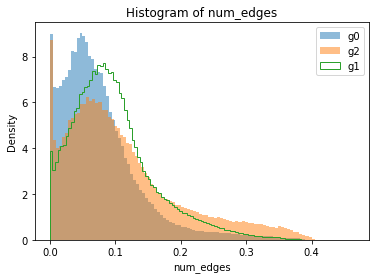

In [5]:
plt.hist(g0_df['num_edges'], bins=100, alpha=0.5, label='g0', density=True)
plt.hist(g2_df['num_edges'], bins=100, alpha=0.5, label='g2', density=True)
plt.hist(g1_df['num_edges'], bins=100, alpha=1., label='g1', density=True, histtype='step')


plt.xlabel('num_edges')
plt.ylabel('Density')
plt.title('Histogram of num_edges')

print('g0 median:', g0_df['num_edges'].median())
print('g1 median:', g1_df['num_edges'].median())
print('g2 median:', g2_df['num_edges'].median())
plt.legend()

g0 median: 0.0529
g1 median: 0.0623
g2 median: 0.0576


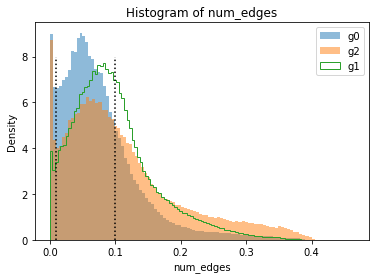

In [6]:
plt.hist(g0_df['num_edges'], bins=100, alpha=0.5, label='g0', density=True)
plt.hist(g2_df['num_edges'], bins=100, alpha=0.5, label='g2', density=True)
plt.hist(g1_df['num_edges'], bins=100, alpha=1., label='g1', density=True, histtype='step')

plt.legend()
plt.xlabel('num_edges')
plt.ylabel('Density')
plt.title('Histogram of num_edges')

minval,maxval = 0.01, 0.1
select_rows = lambda df: df[(df['num_edges']>minval) &(df['num_edges']<maxval)]
g0_sel = select_rows(g0_df)
g1_sel = select_rows(g1_df)
g2_sel = select_rows(g2_df)

plt.vlines([minval, maxval], 0,8, color='k', linestyle='dotted')

print('g0 median:', g0_sel['num_edges'].median())
print('g1 median:', g1_sel['num_edges'].median())
print('g2 median:', g2_sel['num_edges'].median())

g0 median: 0.0529
g0 median: 0.0623
g2 median: 0.0576


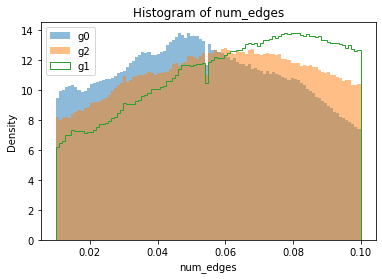

In [7]:
plt.hist(g0_sel['num_edges'], bins=100, alpha=0.5, label='g0', density=True)
plt.hist(g2_sel['num_edges'], bins=100, alpha=0.5, label='g2', density=True)
plt.hist(g1_sel['num_edges'], bins=100, alpha=1., label='g1', density=True, histtype='step')

plt.xlabel('num_edges')
plt.ylabel('Density')
plt.title('Histogram of num_edges')

print('g0 median:', g0_sel['num_edges'].median())
print('g0 median:', g1_sel['num_edges'].median())
print('g2 median:', g2_sel['num_edges'].median())
plt.legend()

In [8]:
minval,maxval = -1.0, 0.1
select_rows = lambda df: df[(df['num_edges']>minval) &(df['num_edges']<maxval)]
g0_sel = select_rows(g0_df)
g1_sel = select_rows(g1_df)
g2_sel = select_rows(g2_df)
print('g0 percentage under 0.1:',100*len(g0_sel)/len(g0_df))
print('g1 percentage under 0.1:',100*len(g1_sel)/len(g1_df))
print('g2 percentage under 0.1:',100*len(g2_sel)/len(g2_df))

g0 percentage under 0.1: 74.55245648409877
g1 percentage under 0.1: 59.19571844221437
g2 percentage under 0.1: 55.12007336710961


In [13]:
from scipy.stats import norm

seq_len = 16
loc=0.05
scale = 0.02
def random_select_single(df, seq_len, loc, scale):
#     seq_num_edges = df['num_edges'].rolling(window=seq_len, min_periods=seq_len).mean()
#     seq_num_edges[:seq_len-1] = seq_num_edges[-(seq_len-1):]
#     seq_num_edges[-(seq_len-1):] = np.nan
    seq_num_edges = df['num_edges']
    df['seq_num_edges'] = seq_num_edges
    
    
    
#     dist_from_loc = abs(seq_num_edges-loc)/scale #between 0, infinity.
#     chances = (2-dist_from_loc)/2
    chances = norm.pdf(seq_num_edges, loc=loc, scale=scale)
    chances = chances/max(chances)

    rand_probs = np.random.rand(len(df))
    
    mask = np.zeros(len(df)).astype(bool)
    for i, chance in enumerate(chances):
        if chance>rand_probs[i]:
            mask[i] = True
            
    return df[mask], mask

In [14]:
# seq_num_edges = g0_df['num_edges'].rolling(window=seq_len, min_periods=seq_len).mean()
seq_len=1
g0_sel2, g0_mask = random_select_single(g0_df, seq_len, loc, scale)
g1_sel2, g1_mask = random_select_single(g1_df, seq_len, loc, scale)
g2_sel2, g2_mask = random_select_single(g2_df, seq_len, loc, scale)

g0 median: 0.0499
g1 median: 0.0536
g2 median: 0.0517


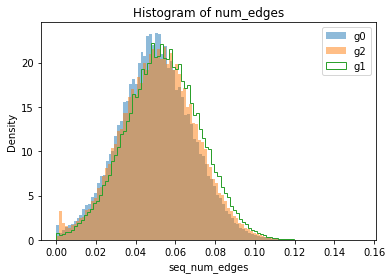

In [15]:
plt.hist(g0_sel2['seq_num_edges'], bins=100, alpha=0.5, label='g0', density=True)
plt.hist(g2_sel2['seq_num_edges'], bins=100, alpha=0.5, label='g2', density=True)
plt.hist(g1_sel2['seq_num_edges'], bins=100, alpha=1., label='g1', density=True, histtype='step')

plt.xlabel('seq_num_edges')
plt.ylabel('Density')
plt.title('Histogram of num_edges')

print('g0 median:', g0_sel2['seq_num_edges'].median())
print('g1 median:', g1_sel2['seq_num_edges'].median())
print('g2 median:', g2_sel2['seq_num_edges'].median())
plt.legend()

In [16]:
def get_samples(rel_filepath, mask, seq_len=16):
    samples = []
    for i, fp in enumerate(tqdm(rel_filepath)):
        if mask[i]:
            samples.append(
                rel_filepath[i:i+seq_len])
    return samples

In [22]:
xtt = g0_df['rel_filepath'].tolist()

In [24]:
seq_len=1

In [25]:
g0_samples = get_samples(
    g0_df['rel_filepath'].tolist(),
    g0_mask, seq_len=seq_len)

100%|█████████████████████████████| 5054704/5054704 [00:08<00:00, 613844.38it/s]


In [28]:
g1_samples = get_samples(
    g1_df['rel_filepath'].tolist(),
    g1_mask,seq_len=seq_len)

g2_samples = get_samples(
    g2_df['rel_filepath'].tolist(),
    g2_mask,seq_len=seq_len)

100%|█████████████████████████████| 4320192/4320192 [00:05<00:00, 764217.06it/s]


In [29]:
import pickle
save_dir = '/N/project/baby_vision_curriculum/tmp_data/simple_sequences/seqlen1_fps30/'

In [30]:
with open(save_dir+'g0_samples.pkl', 'wb') as file:
    pickle.dump(g0_samples, file)
    
with open(save_dir+'g1_samples.pkl', 'wb') as file:
    pickle.dump(g1_samples, file)
    
with open(save_dir+'g2_samples.pkl', 'wb') as file:
    pickle.dump(g2_samples, file)

## For sequences

The above numbers were calulated for individual frames. For a sequence of images, it's important that the seqeunce has a low num_edges on average. We can compute the average of num_edges across a sequence by averaging the num_edges signal over every 3 steps (signal was created at 5fps. for 16 frames, we'd account for 3 consecutive steps)

In [19]:
get_seq_num_edges = lambda s: s.rolling(window=16, min_periods=16).mean()
g0_df['seq_num_edges'] = get_seq_num_edges(g0_df['num_edges'])
g1_df['seq_num_edges'] = get_seq_num_edges(g1_df['num_edges'])
g2_df['seq_num_edges'] = get_seq_num_edges(g2_df['num_edges'])

g0 median: 0.0644125
g1 median: 0.08838749999999997
g2 median: 0.0930875


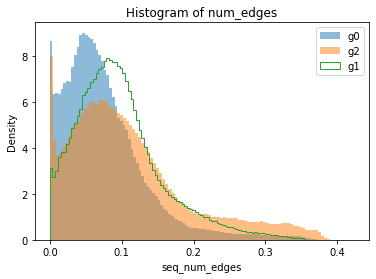

In [20]:
plt.hist(g0_df['seq_num_edges'], bins=100, alpha=0.5, label='g0', density=True)
plt.hist(g2_df['seq_num_edges'], bins=100, alpha=0.5, label='g2', density=True)
plt.hist(g1_df['seq_num_edges'], bins=100, alpha=1., label='g1', density=True, histtype='step')


plt.xlabel('seq_num_edges')
plt.ylabel('Density')
plt.title('Histogram of num_edges')

print('g0 median:', g0_df['seq_num_edges'].median())
print('g1 median:', g1_df['seq_num_edges'].median())
print('g2 median:', g2_df['seq_num_edges'].median())
plt.legend()

The medians are almost identical to those from the individual frames

g0 median: 0.05376875000000001
g1 median: 0.063375
g2 median: 0.0589875


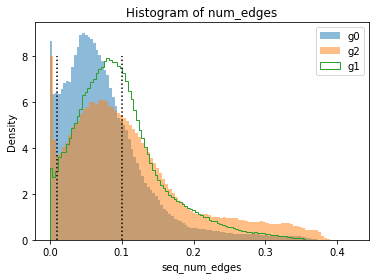

In [21]:
plt.hist(g0_df['seq_num_edges'], bins=100, alpha=0.5, label='g0', density=True)
plt.hist(g2_df['seq_num_edges'], bins=100, alpha=0.5, label='g2', density=True)
plt.hist(g1_df['seq_num_edges'], bins=100, alpha=1., label='g1', density=True, histtype='step')

plt.legend()
plt.xlabel('seq_num_edges')
plt.ylabel('Density')
plt.title('Histogram of num_edges')

minval,maxval = 0.01, 0.1
select_rows = lambda df: df[(df['seq_num_edges']>minval) &(df['seq_num_edges']<maxval)]
g0_sel = select_rows(g0_df)
g1_sel = select_rows(g1_df)
g2_sel = select_rows(g2_df)

plt.vlines([minval, maxval], 0,8, color='k', linestyle='dotted')

print('g0 median:', g0_sel['seq_num_edges'].median())
print('g1 median:', g1_sel['seq_num_edges'].median())
print('g2 median:', g2_sel['seq_num_edges'].median())

In [42]:
from scipy.stats import norm

seq_len = 16
loc=0.05
scale = 0.02
def random_select(df, seq_len, loc, scale):
    seq_num_edges = df['num_edges'].rolling(window=seq_len, min_periods=seq_len).mean()
    seq_num_edges[:seq_len-1] = seq_num_edges[-(seq_len-1):]
    seq_num_edges[-(seq_len-1):] = np.nan
    df['seq_num_edges'] = seq_num_edges
    
    
#     dist_from_loc = abs(seq_num_edges-loc)/scale #between 0, infinity.
#     chances = (2-dist_from_loc)/2
    chances = norm.pdf(seq_num_edges, loc=loc, scale=scale)
    chances = chances/max(chances)

    rand_probs = np.random.rand(len(df))
    
    mask = np.zeros(len(df)).astype(bool)
    for i, chance in enumerate(chances):
        if chance>rand_probs[i]:
            mask[i] = True
            
    return df[mask], mask

In [43]:
# seq_num_edges = g0_df['num_edges'].rolling(window=seq_len, min_periods=seq_len).mean()
g0_sel2, g0_mask = random_select(g0_df, seq_len, loc, scale)
g1_sel2, g1_mask = random_select(g1_df, seq_len, loc, scale)
g2_sel2, g2_mask = random_select(g2_df, seq_len, loc, scale)

In [44]:
print(g0_sel2.shape)
print(g1_sel2.shape)
print(g2_sel2.shape)

(2026008, 3)
(1622541, 3)
(1177007, 3)


g0 median: 0.05034375000000001
g1 median: 0.05410000000000001
g2 median: 0.052137499999999996


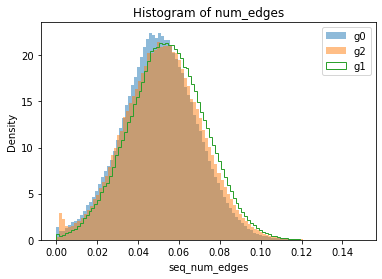

In [45]:
plt.hist(g0_sel2['seq_num_edges'], bins=100, alpha=0.5, label='g0', density=True)
plt.hist(g2_sel2['seq_num_edges'], bins=100, alpha=0.5, label='g2', density=True)
plt.hist(g1_sel2['seq_num_edges'], bins=100, alpha=1., label='g1', density=True, histtype='step')

plt.xlabel('seq_num_edges')
plt.ylabel('Density')
plt.title('Histogram of num_edges')

print('g0 median:', g0_sel2['seq_num_edges'].median())
print('g1 median:', g1_sel2['seq_num_edges'].median())
print('g2 median:', g2_sel2['seq_num_edges'].median())
plt.legend()

In [49]:
def get_samples(rel_filepath, mask):
    samples = []
    seq_len = 16
    for i, fp in enumerate(tqdm(rel_filepath)):
        if mask[i]:
            samples.append(
                rel_filepath[i:i+seq_len])
    return samples

In [50]:
g0_samples = get_samples(
    g0_df['rel_filepath'].tolist(),
    g0_mask)

100%|█████████████████████████████| 5054704/5054704 [00:11<00:00, 439190.23it/s]


In [54]:
g1_samples = get_samples(
    g1_df['rel_filepath'].tolist(),
    g1_mask)

100%|█████████████████████████████| 5317317/5317317 [00:09<00:00, 571498.72it/s]


In [55]:
g2_samples = get_samples(
    g2_df['rel_filepath'].tolist(),
    g2_mask)

100%|█████████████████████████████| 4320192/4320192 [00:09<00:00, 467552.88it/s]


In [56]:
import pickle
save_dir = '/N/project/baby_vision_curriculum/tmp_data/simple_sequences/seqlen16_fps30/'

In [64]:
with open(save_dir+'g0_samples.pkl', 'wb') as file:
    pickle.dump(g0_samples, file)
    
with open(save_dir+'g1_samples.pkl', 'wb') as file:
    pickle.dump(g1_samples, file)
    
with open(save_dir+'g2_samples.pkl', 'wb') as file:
    pickle.dump(g2_samples, file)

In [58]:
with open('g0_samples.pkl', 'rb') as file:
    g0_samples2 = pickle.load(file)

In [59]:
g0_samples2==g0_samples

True